# BLUED TO WAVE


In [8]:
import pandas as pd
import dscleaner as ds
import os
import time # i know theres cell magic, i just cant be bothered on how to get it to work
start = time.time()
dir = "datasets/BLUED/" 
dst = "datasets/BLUED_WAVED_COMPLETE_PHASE_SEPARATED/" #here is the uncompressed folders from BLUED (csv files still compressed)

datasets = os.listdir(dir)
with ds.Merger(2,dst+'BLUED_A.w64', 12000, 'a') as pha:
    with ds.Merger(2,dst+'BLUED_B.w64', 12000, 'a') as phb:
        for dataset in datasets:
            rel_ds_path = os.path.join(dir,dataset) #joins the path to the name
            dst_path = os.path.join(dst,dataset)
            if(os.path.isdir(rel_ds_path)):
                dir_content = os.listdir(rel_ds_path) #shows whats in the directory
                for f in dir_content:
                    if f.endswith(".txt.bz2"): #since the files are still compressed and there are other stuff in the folders; I check for the extension .txt.bz2
                        cur_file = os.path.join(dir,dataset,f) # create a valid path to file
                        csv = pd.read_csv(filepath_or_buffer = cur_file, compression = "bz2", header = 22, usecols = ["Current A", "Current B", "VoltageA"])
                        csv.insert(loc = 3,column = "VoltageB", value = (csv["VoltageA"]*-1)) #adds a column for phase b tension
                        #read as csv
                        csv.fillna(method = 'bfill', inplace = True) #remove any na values
                        with ds.CsvFileInfo(csv[['VoltageA','Current A']].values,12000) as fileA: #while using non sound files the samplerate must be given
                            with ds.FileUtil(fileA) as futil: #FileUtil class has several methods that allow for resampling and other stuff
                                futil.standardize(180,80) #since data is in normal values, the data should be standardized( be between -1 and 1)
                                #you should keep this values for future destandardization reference!
                            #with ds.FileWriter(file) as wr:
                            new_filename = os.path.join(f.split('.')[0]) #creating new filename, the format 
                                #will be the same as the extension
                            print("processing: ",new_filename)
                            #    wr.create_file(new_filepath = new_filename) #write the file to disk
                            #    print("Created",new_filename)        
                            pha.add(fileA)
                            pha.create_file()
                        with ds.CsvFileInfo(csv[['VoltageB','Current B']].values,12000) as fileB:
                            with ds.FileUtil(fileB) as futil:
                                futil.standardize(180,80)
                            phb.add(fileB)
                            phb.create_file()
                        break
                print("dataset processed:", dataset) #
print("Finished!")
end = time.time()
print("It took a mere ",end-start," seconds!")
with open(dst+"0util.txt",'w') as u:
    u.write("Standardized with 80,80,180,180")
    u.write("It took a mere "+end-start+" seconds!")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'datasets/BLUED/'

# 1_LucasPereira to wave

In [2]:
import dscleaner as ds
import os
import time # i know theres cell magic, i just cant be bothered on how to get it to work
start = time.time()
dir = "datasets/1_LucasPereira/"
dst = "datasets/emddf_cleant/"
datasets = os.listdir(dir)
total = 0
for dataset in datasets:
    begin_ds = time.time()
    ds_path = os.path.join(dir,dataset)
    print(ds_path)
    with ds.Merger(2,dir[:-1]+'.w64',12800) as mg:
        with ds.FileInfo(ds_path) as file:
            with ds.FileUtil(file) as futil:
                futil.fix_duration(60)
                print("Fixing duration")
                new_path = os.path.join(dst,dataset)
                print("Creating file")
                #with ds.FileWriter(futil) as writer:
                #    writer.create_file(new_path)
                mg.add(file)
                mg.create_file()
                end_ds = time.time()
            total += end_ds - begin_ds
finish = time.time()
average_time = total/len(datasets)
print("It took a mere ",finish-start," seconds! Avg of ",average_time," s for each dataset")

datasets/1_LucasPereira/1475708700932_1475712300932_3600000_0_1.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475712301669_1475715900932_3599263_737_2.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475715901430_1475719500932_3599502_498_3.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475719501174_1475723100932_3599758_242_4.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475723101922_1475726700932_3599010_990_5.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475726701667_1475730300932_3599265_735_6.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475730301408_1475733900932_3599524_476_7.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475733901168_1475737500932_3599764_236_8.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475737501893_1475741100932_3599039_961_9.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475741101648_1

Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475985901190_1475989500932_3599742_258_78.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475989500935_1475993100932_3599997_3_79.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475993101680_1475996700932_3599252_748_80.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1475996701440_1476000300932_3599492_508_81.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476000301181_1476003900932_3599751_249_82.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476003901936_1476007500932_3598996_1004_83.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476007501699_1476011100932_3599233_767_84.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476011101448_1476014700932_3599484_516_85.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476014701219_1476018300932_3599713_287_86.wav
Fixing duration
Creating file

Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476259501701_1476263100932_3599231_769_154.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476263101328_1476266700932_3599604_396_155.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476266700965_1476270300932_3599967_33_156.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476270301612_1476273900932_3599320_680_157.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476273901247_1476277500932_3599685_315_158.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476277501069_1476281100932_3599863_137_159.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476281101776_1476284700932_3599156_844_160.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476284701442_1476288300932_3599490_510_161.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476288301248_1476291900932_3599684_316_162.wav
Fixing duration
Crea

datasets/1_LucasPereira/1476529501394_1476533100932_3599538_462_229.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476533101730_1476536700932_3599202_798_230.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476536701541_1476540300932_3599391_609_231.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476540301214_1476543900932_3599718_282_232.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476543901738_1476547500932_3599194_806_233.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476547501194_1476551100932_3599738_262_234.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476551101664_1476554700932_3599268_732_235.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476554701164_1476558300932_3599768_232_236.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476558300944_1476561900932_3599988_12_237.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPere

Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476803101207_1476806700932_3599725_275_305.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476806701030_1476810300932_3599902_98_306.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476810301837_1476813900932_3599095_905_307.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476813901449_1476817500932_3599483_517_308.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476817501254_1476821100932_3599678_322_309.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476821101040_1476824700932_3599892_108_310.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476824701856_1476828300932_3599076_924_311.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476828301531_1476831900932_3599401_599_312.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1476831901315_1476835500932_3599617_383_313.wav
Fixing duration
Crea

datasets/1_LucasPereira/1477073101106_1477076700932_3599826_174_380.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1477076701918_1477080300932_3599014_986_381.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1477080301414_1477083900932_3599518_482_382.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1477083901104_1477087500932_3599828_172_383.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1477087501634_1477091100932_3599298_702_384.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1477091101446_1477094700932_3599486_514_385.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1477094701241_1477098300932_3599691_309_386.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1477098301823_1477101900932_3599109_891_387.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPereira/1477101901495_1477105500932_3599437_563_388.wav
Fixing duration
Creating file
3600.0
datasets/1_LucasPer

#  UK-DALE w2

In [23]:
import dscleaner as ds
import pandas as pd
import time
import os
from matplotlib import pyplot as plt
from natsort import natsorted, ns 
#must import thru pip install natsort
#natsort library sorts naturally(from 1  to 10 
dir = 'datasets/UK-DALE/h2/raw/wav_w2/'
dst = 'datasets/uk-dale_h2_w2_12800/'
strt = time.time()
files = natsorted(os.listdir(dir), key = lambda y: y.lower()) #orders crescently
hours = 0
day = 0
for file in files:
    cur_file = os.path.join(dir,file)
    print("Processing: ",cur_file)
    new_file = os.path.join(dst,file)
    with ds.FileInfo(cur_file) as finfo:
        with ds.FileUtil(finfo) as futil:
            futil.fix_duration(60)
            futil.resample(12800)
        if(hours % 23 == 0): #if 24 hours have passed, it means its a new day
            day += 1
        with ds.Merger(channels = 2, path = dst+'day_'+str(day)+'.w64', samplerate = 12800) as mg:
            mg.add(finfo)
            mg.create_file()
    hours += 1 

endt = time.time()
with open(dst+'time.txt','w') as f:
    f.write("Processing took "+str(endt-strt)+"s.")

Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-0.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-1.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-2.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-3.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-4.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-5.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-6.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-7.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-8.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-9.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-10.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-11.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-12.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-13.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-14.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-15.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-16.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-17.wav
Pr

Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-146.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-147.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-148.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-149.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-150.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-151.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-152.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-153.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-154.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-155.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-156.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-157.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-158.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-159.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-160.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-161.wav
Processing:  datasets/UK-DALE/h2/raw/wav_w2/Hour-162.wav
Processing:  datasets/UK-DALE/h

TypeError: can only concatenate str (not "float") to str

# SusDataED LP to wave

In [35]:
import dscleaner as ds
import pandas as pd
import time
import os

In [2]:
dir = 'datasets/individual_loads/'
dst = 'datasets/individual_loads_res/'
strt = time.time()
files = os.listdir(dir)
complete_df = pd.DataFrame()

In [3]:
for csv in files:
    current_file = os.path.join(dir,csv)
    values_dataframe = pd.read_csv(filepath_or_buffer = current_file, usecols=['appliance_name','timestamp', 'power'])
    complete_df = complete_df.append(values_dataframe)

In [4]:
complete_df.sort_values(by=['appliance_name', 'timestamp'],inplace=True)
appliances = complete_df["appliance_name"].drop_duplicates().values

In [5]:
complete_df.drop(columns='timestamp', inplace=True)

In [7]:
import dscleaner as ds
for appl in appliances:
    print("Started ",appl)
    cur_ds = complete_df.loc[complete_df["appliance_name"] == appl]['power']
    with open(dst+"standardize.txt",'a+') as st:
        with ds.CsvFileInfo(cur_ds.values,0.5) as ds_file:
            with ds.FileUtil(ds_file) as futil:
                print("  Resampling...")
                futil.resample(1)
                print("  Standardizing...")
                values = futil.standardize()
            with ds.FileWriter(ds_file) as fw:
                print("  Writing to new file...",)
                new_fp = os.path.join(dst,appl)
                fw.create_file(new_fp+'.wav')
        st.write(str({appl:values})+'\n')

Started  Christmas Lights - LR
  Resampling...
  Standardizing...
  Writing to new file...
Started  Coffe Machine Delta - K1
  Resampling...
  Standardizing...
  Writing to new file...
Started  Coffee Machine Delta - K1
  Resampling...
  Standardizing...
  Writing to new file...
Started  Drier + Curling Iron - WC1
  Resampling...
  Standardizing...
  Writing to new file...
Started  Freezer - K1
  Resampling...
  Standardizing...
  Writing to new file...
Started  Hand Mixer + others - K1
  Resampling...
  Standardizing...
  Writing to new file...
Started  Kettle - K1
  Resampling...
  Standardizing...
  Writing to new file...
Started  MacBook 13 (2007) - LR
  Resampling...
  Standardizing...
  Writing to new file...
Started  MacBook Pro 13 (2011) - BR2
  Resampling...
  Standardizing...
  Writing to new file...
Started  MacBook Pro 13 (2011) - OF
  Resampling...
  Standardizing...
  Writing to new file...
Started  Microwave - K1
  Resampling...
  Standardizing...
  Writing to new file..

In [53]:
cur_ds.values.shape[0]

1004901

In [4]:


for csv in files:
    print("Processing ", csv,":")
    current_file = os.path.join(dir,csv)
    values_dataframe = pd.read_csv(filepath_or_buffer = current_file, usecols=['appliance','timestamp', 'power'])
    print("  Loading...")
    with open(dst+"standardize.txt",'a+') as st:
        with ds.CsvFileInfo(values_dataframe.values,0.5) as ds_file:
            with ds.FileUtil(ds_file) as futil:
                print("  Resampling...")
                futil.resample(1)
                print("  Standardizing...")
                values = futil.standardize()
            with ds.FileWriter(ds_file) as fw:
                print("  Writing to new file...",)
                new_fp = os.path.join(dst,csv)
                fw.create_file(new_fp+'.wav')
        st.write(str({csv:values})+'\n')


Processing  Christmas Lights - 000D6F00025F6714.csv :
  Loading...
  Resampling...
  Standardizing...
  Writing to new file...
Processing  Coffee Machine - 000D6F000261B01C.csv :
  Loading...
  Resampling...
  Standardizing...
  Writing to new file...
Processing  Freezer - 000D6F0000B19D4C@HybridNILM (aveiro).csv :
  Loading...
  Resampling...
  Standardizing...
  Writing to new file...
Processing  Hair Drier + Curling Iron - 000D6F000261B237@HybridNILM (aveiro).csv :
  Loading...
  Resampling...
  Standardizing...
  Writing to new file...
Processing  Hand Mixer + others - 000D6F0000B834F1@HybridNILM (aveiro).csv :
  Loading...
  Resampling...
  Standardizing...
  Writing to new file...
Processing  Kettle - 000D6F0000B1D7B2@HybridNILM (aveiro).csv :
  Loading...
  Resampling...
  Standardizing...
  Writing to new file...
Processing  MacBook 13 (2007) - 000D6F00025F6854@HybridNILM (aveiro).csv :
  Loading...
  Resampling...
  Standardizing...
  Writing to new file...
Processing  MacBook

KeyboardInterrupt: 

# Paper graphs

## Time correction example (Figure 4)

In [76]:
import dscleaner as ds
with ds.FileInfo('../datasets/LP49.wav') as finfo:
    before_fixing = finfo.getSamples()
    with ds.FileUtil(finfo) as futil:
        futil.fix_duration(60)
        after_fixing = finfo.getSamples()
        with ds.FileWriter(finfo) as fw:
            fw.create_file('../datasets/LP49_fixed.wav')

In [214]:
df4 = pd.DataFrame(before_fixing[-1000:,0])
df5 = pd.DataFrame(before_fixing[-int(12800/50):,0])
df5.index += int(12800/52)*3
df6 = (list(df5.values)*4)
df6 = pd.DataFrame(df6)
df6.index += len(df4)

In [ ]:
df = pd.DataFrame(before_fixing[-1000:,1])
df2 = pd.DataFrame(before_fixing[-int(12800/50):,1])
df2.index += int(12800/52)*3
df3 = (list(df2.values)*4)
df3 = pd.DataFrame(df3)
df3.index += len(df)

### trying to build  the plots

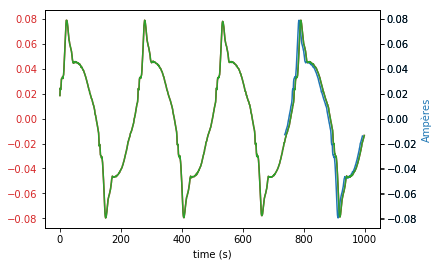

In [158]:
#with twinx
import pandas as pd

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')

#ax1.set_ylabel('Voltage', color=color)
ax1.plot(df, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax12 = ax1.twinx()
color = 'tab:blue'
ax12.set_ylabel('Ampères', color=color)
ax12.tick_params(axis='y', labelcolor=color)
ax12.plot(df2, color = color)
fig1.tight_layout()  # otherwise the right y-label is slightly clipped
color = 'tab:green'

ax13 = ax1.twinx()

ax13.plot(df,color=color)

plt.show()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Final Plots

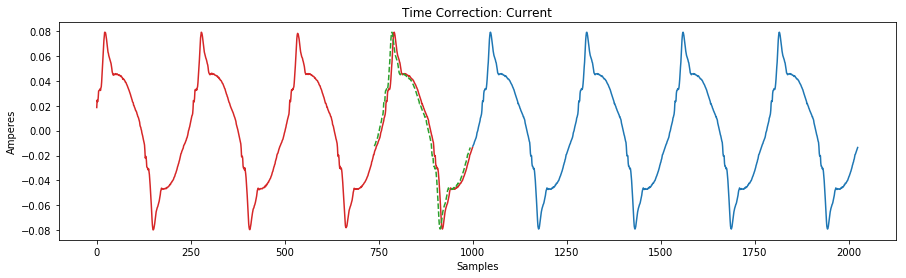

In [258]:
fig = plt.figure(figsize=(15,4))
x = np.arange(1, 2000)
plt.plot(df,color='tab:red')
plt.plot(df2,'--',color='tab:green')
plt.plot(df3,color='tab:blue')
plt.ylabel("Amperes")
plt.title("Time Correction: Current")
plt.xlabel("Samples")
plt.savefig("current_fixing.png", bbox_inches='tight')

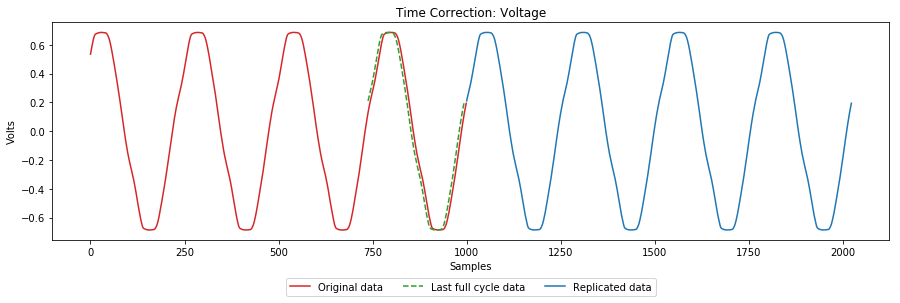

In [257]:
fig = plt.figure(figsize=(15,4))
x = np.arange(1, 2000)
plt.plot(df4,color='tab:red', label="Original data")
plt.plot(df5,'--',color='tab:green', label="Last full cycle data")
plt.plot(df6,color='tab:blue', label="Replicated data")
plt.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.25, -0.28, 0.5, -0.5))
plt.ylabel("Volts")
plt.title("Time Correction: Voltage")
plt.xlabel("Samples")
plt.savefig("voltage_fixing.png", bbox_inches='tight')
plt.show()

## Resampling example (Figure 5)

### Resampling and creating the files

In [6]:
import matplotlib.pyplot as plt
import dscleaner as ds
original="../datasets/res_test.wav"
with ds.FileInfo(original) as finfo:
    print(finfo.getNumberOfFrames())
    with ds.FileUtil(finfo) as futil:
        sixteen=finfo.getSamples()
        with ds.FileWriter(finfo) as fw:
            futil.resample(6400)
            six = finfo.getSamples()
            fw.create_file("../datasets/res_6400.wav")
            futil.resample(3200)
            three = finfo.getSamples()
            fw.create_file("../datasets/res_3200.wav")
            futil.resample(12800)
            twelve = finfo.getSamples()
            fw.create_file("../datasets/res_12800.wav")

1000


In [71]:
data = sixteen #this varies from six to sixteen in order to get the graph

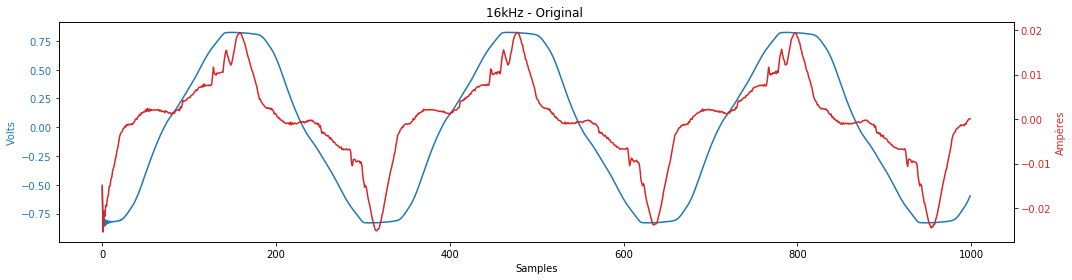

'plt.title("16kHz - Current")\nplt.plot(sixteen[:,0])\nplt.title("16kHz - Voltage")'

In [72]:

fig1, ax1 = plt.subplots(figsize=(15,4))
ax1.set_xlabel('Samples')
color = 'tab:blue'
plt.title("16kHz - Original ")

ax1.plot(data[:,0], color = color)
ax1.set_ylabel('Volts', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax12 = ax1.twinx()
color = 'tab:red'
ax12.set_ylabel('Ampères', color=color)
ax12.tick_params(axis='y', labelcolor=color)

ax12.plot(data[:,1], color = color)
fig1.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
"""plt.title("16kHz - Current")
plt.plot(sixteen[:,0])
plt.title("16kHz - Voltage")"""

## Normalization example (Figure 6)

In [ ]:
import pandas as pd
import dscleaner as ds

import os
import time # i know theres cell magic, i just cant be bothered on how to get it to work
start = time.time()
dir = "../datasets/BLUED/" 
dst = "../datasets/BLUED/" 
datasets = os.listdir(dir)

for dataset in datasets:
    rel_ds_path = os.path.join(dir,dataset) #joins the path to the name
    dst_path = os.path.join(dst,dataset)
    if(os.path.isdir(rel_ds_path)):
        dir_content = os.listdir(rel_ds_path) #shows whats in the directory
        for f in dir_content:
            if f.endswith(".txt.bz2"): #since the files are still compressed and there are other stuff in the folders; I check for the extension .txt.bz2
                cur_file = os.path.join(dir,dataset,f) # create a valid path to file
                csv = pd.read_csv(filepath_or_buffer = cur_file, compression = "bz2", header = 22, usecols = ["Current A", "VoltageA"])
                csv.fillna(method = 'bfill', inplace = True) #remove any na values
                with ds.CsvFileInfo(csv.values,12000) as fileA: #while using non sound files the samplerate must be given
                    with ds.FileWriter(fileA) as fw:
                        fw.create_file('../datasets/BLUED_test/raw.wav')
                        with ds.FileUtil(fileA) as futil: #FileUtil class has several methods that allow for resampling and other stuff
                            futil.standardize() #since data is in normal values, the data should be standardized( be between -1 and 1)
                        fw.create_file('../datasets/BLUED_test/normalized.wav')
                break
    print("dataset processed:", dataset)
    break
print("Finished!")


### Creating the variables for plotting

In [24]:
import matplotlib.pyplot as plt
import dscleaner as ds
with ds.FileInfo('../datasets/BLUED_test/raw.wav') as raw:
    with ds.FileInfo('../datasets/BLUED_test/normalized.wav') as normalize:
        plt.plot(normalize.getSamples()[:200])
        plt.plot(raw.getSamples()[:200])

### Creating the plots

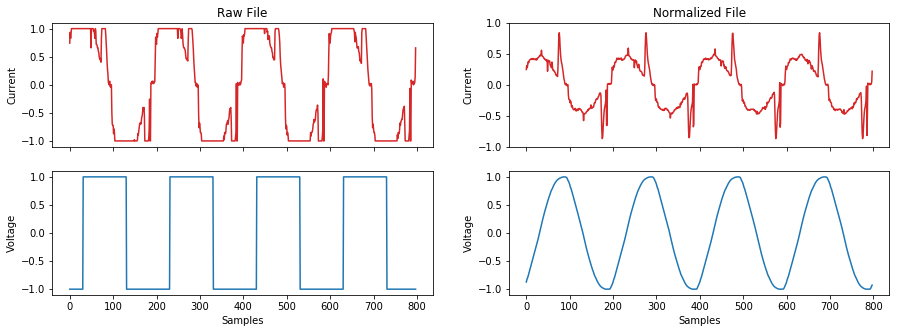

In [25]:
fig = plt.figure(figsize = (15,5))
ax1 = plt.subplot(2,2,1)
plt.title("Raw File")
plt.plot(raw.getSamples()[:399*2,0], label = 'Current', color='tab:red')
plt.ylabel('Current')
plt.subplot(2,2,3,sharex=ax1)
plt.plot(raw.getSamples()[:399*2,1], label = 'Voltage')
# make these tick labels invisible
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Voltage')
plt.xlabel('Samples')

ax1 = plt.subplot(2,2,2)
plt.title("Normalized File")
plt.plot(normalize.getSamples()[:399*2,0], label = 'Current', color='tab:red')
plt.ylim([-1,1])
plt.ylabel('Current')
plt.subplot(2,2,4,sharex=ax1)
plt.plot(normalize.getSamples()[:399*2,1], label = 'Voltage')
# make these tick labels invisible
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Voltage')
plt.xlabel('Samples')
#plt.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.25, -0.40, 0.5, -0.5))
plt.show()
fig.savefig('normalize.pdf', bbox_inches='tight')